# Building a Model that Classifies the Side - Effects of a Drug

**Objective Of This Project**<br> <br>
Is to build a classification model that classifies the side effects of a particular drug by age, gender and race

## Loading Important Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
pd.options.mode.chained_assignment = None  # default='warn'
from IPython.html import widgets
from IPython.display import display
from collections import OrderedDict
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder #One hot encoding for Categorical variables
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from collections import Counter
import re
import string

D:\Python\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


## Importing DataSet - "webmd"

In [2]:
df = pd.read_csv("D:\TCS project\Data sets\webmd.csv") 

## Checking Columns name present in the DataSet

In [3]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

## About this DataSet

<br> 1. **Drug (categorical):** name of drug
<br> 2. **DrugId (numerical):** drug id
<br> 3. **Condition (categorical):** name of condition
<br> 4. **Review (text):** patient review
<br> 5. **Side (text):** side effects associated with drug (if any)
<br> 6. **EaseOfUse (numerical):** 5 star rating
<br> 7. **Effectiveness (numerical):** 5 star rating
<br> 8. **Satisfaction (numerical):** 5 star rating
<br> 9. **Date (date):** date of review entry
<br> 10. **UsefulCount (numerical):** number of users who found review useful.
<br> 11. **Age (numerical):** age group range of user
<br> 12. **Sex (categorical):** gender of user

## Cleaning the Data

By going through the DataSet we can observe that there are empty values/empty string present in the Review and Sides Columns. So we are gonna convert the empty value/empty string into np.nan object and then remove them

In [4]:
df.head(10)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
5,55-64,Other,7/19/2008,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,,0
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
8,25-34,Acne,4/27/2016,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1
9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0


Cleaning the 'Review' and 'Sides' part from the columns is carried out to make data more readable and less redundant.

Cleaning the 'Review' and 'Sides' part from the columns is carried out to make data more readable and less redundant.

In [5]:
df['Reviews'].replace(' ', np.nan, inplace=True)

In [6]:
df['Reviews'].isnull().sum()

41861

Next we are gonna replace all the empty strings in the "Reviews" column with np.nan objects in the following manner

In [7]:
df['Sides'].replace(' ', np.nan, inplace=True)

In [8]:
df['Sides'].isnull().sum()

17460

Next we are gonna replace all the empty strings in the "Sides" column with np.nan objects in the following manner

Now we are gonna remove all the records which had no value in their "Reviews" Column

In [9]:
df.dropna(subset=['Reviews'], inplace=True)

Now we are gonna remove all the records which had no value in their "Reviews" Column

In [10]:
df.dropna(subset=['Sides'], inplace=True)

In [11]:
df['Reviews'].isnull().sum()

0

In [12]:
df['Sides'].isnull().sum()

0

## Determining if the DataFrame still contains any Null-Values or Not

In [13]:
df.isnull().values.any()

False

Since there are no more null-values present in the dataset therefore we can proceed with Exploratory Data Analysis. 

_______________________________________________________________________________________________________________________________

## Removing Empty Strings from the column "Sex"

We are gonna check if the "Sex" column has any empty strings/ Empty values

In [14]:
print(df["Sex"].value_counts())

Female    205842
Male       78138
           21367
Name: Sex, dtype: int64


Here we can see in below that "Sex" column have values (21367) which have not been categorised.

Pandas will recognise a value as null if it is a np.nan object, which will print as NaN in the DataFrame. But the missing values are probably empty strings, which Pandas doesn't recognise as null. To fix this, We can convert the empty stings (or whatever is in the empty cells) to np.nan objects using replace(), and then call dropna()on your DataFrame to delete rows with null values present in the "Sex" column.<br><br>
Therefore we will replace all the empty strings in the Sex column with np.nan objects.



In [15]:
df['Sex'].replace(' ', np.nan, inplace=True)

In [16]:
df['Sex'].isnull().sum()

21367

Now we will drop all the null values present in the "Sex" column.

In [17]:
df.dropna(subset=['Sex'], inplace=True)

All the null values have been removed that were present in the form of empty string/ empty cells in "Sex" column.

In [18]:
print(df["Sex"].value_counts())

Female    205842
Male       78138
Name: Sex, dtype: int64


So now we can see all the values which had no category have been removed from the column "Sex"

_______________________________________________________________________________________________________________________________

## Removing Empty Strings from the column "Age"

We are now gonna check if the column "Age" has empty strings or not

In [19]:
df.Age.value_counts()

45-54         64129
55-64         57473
35-44         45476
25-34         42800
65-74         29986
19-24         21236
75 or over    10730
13-18          5975
               3825
7-12           1334
3-6             623
0-2             393
Name: Age, dtype: int64

Here we can observe the same issue that the column "Age" has empty values/empty string (5975, 3825). Therefore we are gonna convert these empty values into 'np.nan' objects

In [20]:
df['Age'].replace(' ', np.nan, inplace=True)

Now we can drop the null values present in the "Age" column

In [21]:
df.dropna(subset=['Age'], inplace=True)

In [22]:
df.Age.value_counts()

45-54         64129
55-64         57473
35-44         45476
25-34         42800
65-74         29986
19-24         21236
75 or over    10730
13-18          5975
7-12           1334
3-6             623
0-2             393
Name: Age, dtype: int64

So now we can see all the values which had no category have been removed from the column "Age"

**For easy convetion we gonna categorise each age group as numbers and store them in new column "Age_Group_Number" in the following manner**

**Age<br><br>
0-2         > 1<br>
3-6         > 2<br>
7-12        > 3<br>
13-18       > 4<br>
19-24       > 5<br>
25-34       > 6<br>
35-44       > 7<br>
45-54       > 8<br>
55-64       > 9<br>
65-74       > 10<br>
75 or over  > 11<br>**

In [23]:
def age_fun(df):
    if df['Age'] == '0-2':
        return 1
    elif df['Age'] == '13-18':
        return 4
    elif df['Age'] == '19-24':
        return 5
    elif df['Age'] == '25-34':
        return 6
    elif df['Age'] == '3-6':
        return 2
    elif df['Age'] == '35-44':
        return 7
    elif df['Age'] == '45-54':
        return 8
    elif df['Age'] == '55-64':
        return 9
    elif df['Age'] == '65-74':
        return 10
    elif df['Age'] == '7-12':
        return 3
    elif df['Age'] == '75 or over':
        return 11

In [24]:
df['Age_Group_number'] = df.apply(age_fun, axis = 1)

In [25]:
df.head(1)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Age_Group_number
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,11


_______________________________________________________________________________________________________________________________

## "Effectiveness" column contains rating value from 1 to 5, Therefore values that indicates rating of 6 will be removed in order to get a clean Data Set

In [26]:
df.Effectiveness.value_counts()

5    101860
4     62305
1     47150
3     45180
2     23658
6         2
Name: Effectiveness, dtype: int64

In [27]:
index_names = df[ df['Effectiveness'] == 6 ].index

In [28]:
df.drop(index_names, inplace = True)

In [29]:
df.Effectiveness.value_counts()

5    101860
4     62305
1     47150
3     45180
2     23658
Name: Effectiveness, dtype: int64

## Cleaning Text Data from column "Sides" and "Reviews"

Applying a first round of text cleaning techniques

In [30]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [31]:
df['Sides'] = pd.DataFrame(df['Sides'].apply(round1))
df['Reviews'] = pd.DataFrame(df['Reviews'].apply(round1))

Applying a second round of text cleaning techniques

In [32]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [33]:
df['Sides'] = pd.DataFrame(df['Sides'].apply(round2))
df['Reviews'] = pd.DataFrame(df['Reviews'].apply(round2))

In [34]:
stop = stopwords.words('english')
df['Sides'] = df['Sides'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [35]:
result = Counter(" ".join(df['Sides'].values.tolist()).split(" ")).items()
print(result)

dict_items([('drowsiness', 123616), ('dizziness', 176464), ('dry', 78863), ('mouth', 82090), ('nosethroat', 1588), ('headache', 102775), ('upset', 48827), ('stomach', 65314), ('constipation', 88824), ('trouble', 54410), ('sleeping', 56767), ('may', 287863), ('occur', 286809), ('nausea', 167326), ('vomiting', 109986), ('bloating', 18662), ('breast', 17630), ('tenderness', 17196), ('swelling', 20883), ('ankles', 14611), ('feet', 14519), ('fluid', 12603), ('retention', 11325), ('weight', 51203), ('change', 22386), ('temporary', 2159), ('burning', 7019), ('stinging', 3322), ('dryness', 3645), ('nose', 8153), ('runny', 2555), ('sneezing', 327), ('gain', 17574), ('diarrhea', 65416), ('muscle', 7152), ('pain', 30445), ('loss', 86044), ('appetite', 56184), ('way', 4), ('food', 5), ('tastes', 5), ('tiredness', 62680), ('bad', 6129), ('taste', 18057), ('joint', 4128), ('back', 1562), ('difficulty', 8492), ('concentrating', 2917), ('weakness', 20642), ('blurred', 36713), ('vision', 37329), ('pyri

In [36]:
 sorted(result, key=lambda x: (-x[1], x[0]))

[('may', 287863),
 ('occur', 286809),
 ('dizziness', 176464),
 ('nausea', 167326),
 ('drowsiness', 123616),
 ('vomiting', 109986),
 ('headache', 102775),
 ('constipation', 88824),
 ('loss', 86044),
 ('mouth', 82090),
 ('dry', 78863),
 ('diarrhea', 65416),
 ('stomach', 65314),
 ('tiredness', 62680),
 ('lightheadedness', 61669),
 ('sleeping', 56767),
 ('appetite', 56184),
 ('trouble', 54410),
 ('weight', 51203),
 ('upset', 48827),
 ('sweating', 47953),
 ('vision', 37329),
 ('blurred', 36713),
 ('increased', 34811),
 ('pain', 30445),
 ('medication', 22997),
 ('change', 22386),
 ('swelling', 20883),
 ('weakness', 20642),
 ('body', 19082),
 ('bloating', 18662),
 ('coordination', 18385),
 ('adjusts', 18152),
 ('taste', 18057),
 ('breast', 17630),
 ('gain', 17574),
 ('tenderness', 17196),
 ('unusual', 15542),
 ('abdominal', 15327),
 ('heartburn', 14761),
 ('ankles', 14611),
 ('feet', 14519),
 ('nervousness', 14466),
 ('changes', 13470),
 ('tremor', 12973),
 ('fluid', 12603),
 ('shaking', 1254

_______________________________________________________________________________________________________________________________

# Exploratory Data Analysis

## Visual Representation of Age Distribution

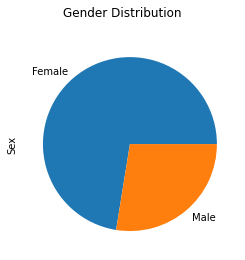

In [37]:
data1 = df['Sex'].tolist()
male=data1.count('Male')
female=data1.count('Female')
ax = df.Sex.value_counts().plot.pie(subplots = True,figsize = (8,4), title = "Gender Distribution");

## Visual Representation of  Gender Distribution

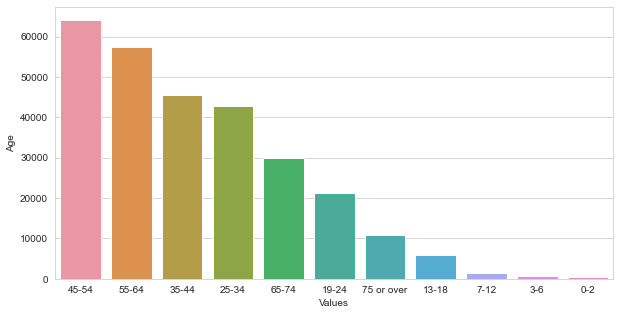

In [38]:
ageColourful = df['Age'].value_counts().reset_index()
ageColourful.columns = ["Values", "Age"]
ageColourful

# set style
sns.set_style("whitegrid");

plt.figure(figsize = (10,5));
sns.barplot(x = 'Values',y ='Age', data = ageColourful);
plt.show();

## Visual Representation of Effectiveness Rating

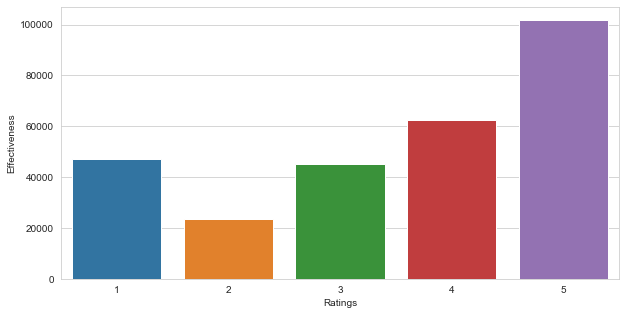

In [39]:
effectivenessRatingColourful = df['Effectiveness'].value_counts().reset_index()
effectivenessRatingColourful.columns = ["Ratings", "Effectiveness"]
effectivenessRatingColourful

# set style
sns.set_style("whitegrid");

plt.figure(figsize=(10,5));
sns.barplot(x = 'Ratings',y = 'Effectiveness', data = effectivenessRatingColourful);
plt.show();

## Visual  Representation of EaseofUse Rating

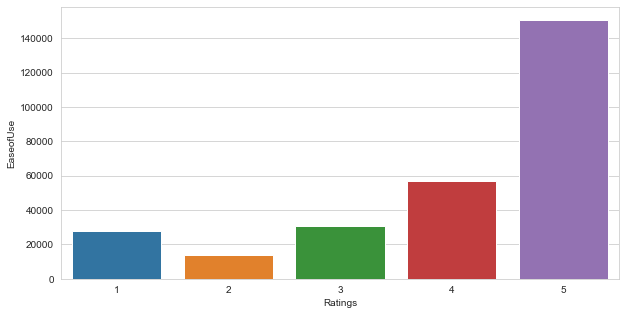

In [40]:
easeOfUseRatingColourful = df['EaseofUse'].value_counts().reset_index()
easeOfUseRatingColourful.columns = ["Ratings", "EaseofUse"]
easeOfUseRatingColourful

# set style
sns.set_style("whitegrid");
plt.figure(figsize = (10,5));
sns.barplot(x = 'Ratings',y = "EaseofUse", data = easeOfUseRatingColourful);
plt.show();

_______________________________________________________________________________________________________________________________

## Building Classification Model

## One Hot Encoding

In [41]:
le_age=LabelEncoder()
le_DrugId=LabelEncoder()
le_Sex=LabelEncoder()
le_Condition=LabelEncoder()

In [42]:
df['age_n']=le_age.fit_transform(df['Age_Group_number'])
df['DrugId_n']=le_DrugId.fit_transform(df['DrugId'])
df['Sex_n']=le_Sex.fit_transform(df['Sex'])
df['condition_n']=le_Condition.fit_transform(df['Condition'])

# Filter "Side Effect"

We are Gonna take 5 Random Side Effects for this model <br><br>
1.Dizziness<br>
2.Nausea<br>
3.Drowsiness<br>
4.Vomitting<br>
5.Headache<br>

In [43]:
SideEffect_Name=widgets.RadioButtons(
            options=['dizziness', 'nausea', 'drowsiness','vomiting','headache'],
            layout={'width': 'max-content'})

Now we are gonna create a list of Side Effects from the Data set

In [44]:
display(SideEffect_Name)

RadioButtons(layout=Layout(width='max-content'), options=('dizziness', 'nausea', 'drowsiness', 'vomiting', 'he…

In [45]:
SideEffect_Name.value

'dizziness'

Filter Only that Side Effect

In [46]:
df=df[df['Sides'].str.contains(SideEffect_Name.value)] 

**Consider only useful reviews**

**It will filter and display only those values which have drug name as "Selected Drug name as per the user"**

In [47]:
df=df[df['UsefulCount']>1] 

In [48]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Age_Group_number,age_n,DrugId_n,Sex_n,condition_n
122,65-74,Cancer of Ovary in Patient with Germline BRCA ...,12/8/2016,lynparza tablet,167493,5,5,low hgb for the first months but not as tired...,5,Female,nausea vomiting loss appetite diarrhea headach...,10,10,9,4256,0,291
123,45-54,Cancer of Ovary in Patient with Germline BRCA ...,7/13/2016,lynparza tablet,167493,5,5,prescribed lynparza after my firstline ivip ch...,5,Female,nausea vomiting loss appetite diarrhea headach...,18,8,7,4256,0,291
124,55-64,Cancer of Ovary in Patient with Germline BRCA ...,6/21/2016,lynparza tablet,167493,5,5,i take six pills twice a day and no food one h...,5,Female,nausea vomiting loss appetite diarrhea headach...,20,9,8,4256,0,291
125,45-54,Cancer of Ovary in Patient with Germline BRCA ...,5/23/2016,lynparza tablet,167493,5,5,only issue i am having is sun exposure rash on...,4,Female,nausea vomiting loss appetite diarrhea headach...,14,8,7,4256,0,291
178,65-74,Cancer of Ovary in Patient with Germline BRCA ...,12/8/2016,lynparza,167493,5,5,low hgb for the first months but not as tired...,5,Female,nausea vomiting loss appetite diarrhea constip...,10,10,9,4256,0,291


## Filter "Drug Name"

In [49]:
DrugList=df.Drug.value_counts().head(15)

In [50]:
DrugList=DrugList.to_dict()
print(DrugList)

{'lisinopril solution': 2888, 'lisinopril': 2888, 'lexapro': 2710, 'effexor xr': 2326, 'lyrica': 2095, 'tramadol hcl': 1750, 'tramadol hcl er': 1750, 'zoloft': 1743, 'topamax capsule, sprinkle': 1541, 'topamax': 1541, 'hydrocodone-acetaminophen': 1525, 'phentermine hcl': 1509, 'neurontin': 1460, 'neurontin capsule': 1460, 'trazodone hcl': 1421}


In [51]:
Drug_Name=widgets.Dropdown( options=DrugList.keys(),
labels='Enter the name of the Drug: \t',
disabled=False,
)

In [52]:
display(Drug_Name)

Dropdown(options=('lisinopril solution', 'lisinopril', 'lexapro', 'effexor xr', 'lyrica', 'tramadol hcl', 'tra…

In [53]:
Drug_Name.value

'lisinopril solution'

In [54]:
df = df[df['Drug'].isin([Drug_Name.value])]

It will filter and display only those values which have drug name as "Selected Drug name as per the user"

In [55]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Age_Group_number,age_n,DrugId_n,Sex_n,condition_n
9203,75 or over,High Blood Pressure,2/8/2020,lisinopril solution,6873,5,4,i have developed a very itch rash on my body f...,4,Female,dizziness lightheadedness tiredness headache m...,3,11,10,943,0,668
9209,55-64,High Blood Pressure,1/14/2020,lisinopril solution,6873,4,5,tried alternative medicine beet root hibiscus ...,4,Male,dizziness lightheadedness tiredness headache m...,3,9,8,943,1,668
9215,65-74,High Blood Pressure,10/17/2019,lisinopril solution,6873,5,5,have been taking mg doses per day for over y...,5,Male,dizziness lightheadedness tiredness headache m...,6,10,9,943,1,668
9221,55-64,High Blood Pressure,10/13/2019,lisinopril solution,6873,2,4,i dont like that im taking this and not knowin...,2,Male,dizziness lightheadedness tiredness headache m...,12,9,8,943,1,668
9227,55-64,High Blood Pressure,8/16/2019,lisinopril solution,6873,3,1,was on this medicine for about months and hav...,1,Female,dizziness lightheadedness tiredness headache m...,22,9,8,943,0,668


# Filter "Gender"

Select either in order to filter the gender <br>
1. Male <br>
or<br>
2. Female<br>

In [56]:
gender_opt=widgets.RadioButtons(
            options=['Male', 'Female'],
            layout={'width': 'max-content'})

In [58]:
display(gender_opt)

RadioButtons(index=1, layout=Layout(width='max-content'), options=('Male', 'Female'), value='Female')

In [59]:
gender_opt.value

'Female'

In [60]:
df=df[df['Sex'].str.contains(gender_opt.value)] 

In [61]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Age_Group_number,age_n,DrugId_n,Sex_n,condition_n
9203,75 or over,High Blood Pressure,2/8/2020,lisinopril solution,6873,5,4,i have developed a very itch rash on my body f...,4,Female,dizziness lightheadedness tiredness headache m...,3,11,10,943,0,668
9227,55-64,High Blood Pressure,8/16/2019,lisinopril solution,6873,3,1,was on this medicine for about months and hav...,1,Female,dizziness lightheadedness tiredness headache m...,22,9,8,943,0,668
9233,25-34,High Blood Pressure,6/3/2019,lisinopril solution,6873,5,2,i was placed on a low dose of lisinopril after...,1,Female,dizziness lightheadedness tiredness headache m...,37,6,5,943,0,668
9239,35-44,Other,6/2/2019,lisinopril solution,6873,5,5,no script or health insurance needed to place ...,5,Female,dizziness lightheadedness tiredness headache m...,24,7,6,943,0,1045
9251,65-74,High Blood Pressure,5/6/2019,lisinopril solution,6873,3,2,i just started taking it,2,Female,dizziness lightheadedness tiredness headache m...,4,10,9,943,0,668


## Converting data type of "Reviews" column  

In [62]:
df['Reviews'] = df['Reviews'].astype(str)

In [63]:
df.head(1)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Age_Group_number,age_n,DrugId_n,Sex_n,condition_n
9203,75 or over,High Blood Pressure,2/8/2020,lisinopril solution,6873,5,4,i have developed a very itch rash on my body f...,4,Female,dizziness lightheadedness tiredness headache m...,3,11,10,943,0,668


In [64]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

df['sentiment'] = df['Reviews'].apply(sentiment_calc)

In [65]:
df.sentiment.head()

9203    0.04375
9227   -0.17000
9233   -0.04376
9239    0.30000
9251    0.00000
Name: sentiment, dtype: float64

In [66]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df ['Review_Sentiment'] = df['sentiment'].apply(getAnalysis )

Here we are categorising Side effects in terms of following two score :-<br>
1. Score < 0 - Negative (Which indicates that the patient did suffer side effects using the Drug)
2. Score > 0 - Positive and Neutral (Which indicates that the patient did not suffer any side effects using the Drug)

Side-effect prediction based on sentiment score and store it in a new column

In [67]:
def getAnalysis(score):
  if score < 0:
    return 1
  else:
    return 0

df ['Review_Score'] = df['sentiment'].apply(getAnalysis )

Here we are storing the values (0 and 1) which will indicate if the patient suffer from side effect or not <br>\
0 (Positive) - Patient did not suffer any side effects <br>
1 (Negative) - Patient did suffer side effects <br>

In [68]:
df.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Age_Group_number,age_n,DrugId_n,Sex_n,condition_n,sentiment,Review_Sentiment,Review_Score
9203,75 or over,High Blood Pressure,2/8/2020,lisinopril solution,6873,5,4,i have developed a very itch rash on my body f...,4,Female,dizziness lightheadedness tiredness headache m...,3,11,10,943,0,668,0.04375,Positive,0
9227,55-64,High Blood Pressure,8/16/2019,lisinopril solution,6873,3,1,was on this medicine for about months and hav...,1,Female,dizziness lightheadedness tiredness headache m...,22,9,8,943,0,668,-0.17000,Negative,1
9233,25-34,High Blood Pressure,6/3/2019,lisinopril solution,6873,5,2,i was placed on a low dose of lisinopril after...,1,Female,dizziness lightheadedness tiredness headache m...,37,6,5,943,0,668,-0.04376,Negative,1
9239,35-44,Other,6/2/2019,lisinopril solution,6873,5,5,no script or health insurance needed to place ...,5,Female,dizziness lightheadedness tiredness headache m...,24,7,6,943,0,1045,0.30000,Positive,0
9251,65-74,High Blood Pressure,5/6/2019,lisinopril solution,6873,3,2,i just started taking it,2,Female,dizziness lightheadedness tiredness headache m...,4,10,9,943,0,668,0.00000,Neutral,0


# Negative Reviews age wise

In [69]:
df_3=df[df.Review_Sentiment=="Negative"]

In [70]:
print(df_3["Age"].value_counts())

55-64         242
45-54         242
65-74         132
35-44         116
75 or over     47
25-34          39
19-24           2
13-18           1
Name: Age, dtype: int64


**Total Reviews**

In [71]:
print(df["Age"].value_counts())

55-64         539
45-54         530
65-74         300
35-44         261
75 or over    103
25-34          97
19-24          11
13-18           2
Name: Age, dtype: int64


# Building a Logistic Regression Model 

In [72]:
logModel = LogisticRegression()

Testing 

In [73]:
X_var = df[['EaseofUse','Effectiveness','Satisfaction','Sex_n','Age_Group_number']].values # independent variable
y_var = df['Review_Score'].values # dependent variable

Train - Test Split

Dropping the whole index column

In [74]:
df.reset_index(drop=True, inplace=True)

Adding and reseting the index column

In [75]:
df.reset_index()

,index,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,...,Sides,UsefulCount,Age_Group_number,age_n,DrugId_n,Sex_n,condition_n,sentiment,Review_Sentiment,Review_Score
0,0,75 or over,High Blood Pressure,2/8/2020,lisinopril solution,6873,5,4,i have developed a very itch rash on my body f...,4,...,dizziness lightheadedness tiredness headache m...,3,11,10,943,0,668,0.043750,Positive,0
1,1,55-64,High Blood Pressure,8/16/2019,lisinopril solution,6873,3,1,was on this medicine for about months and hav...,1,...,dizziness lightheadedness tiredness headache m...,22,9,8,943,0,668,-0.170000,Negative,1
2,2,25-34,High Blood Pressure,6/3/2019,lisinopril solution,6873,5,2,i was placed on a low dose of lisinopril after...,1,...,dizziness lightheadedness tiredness headache m...,37,6,5,943,0,668,-0.043760,Negative,1
3,3,35-44,Other,6/2/2019,lisinopril solution,6873,5,5,no script or health insurance needed to place ...,5,...,dizziness lightheadedness tiredness headache m...,24,7,6,943,0,1045,0.300000,Positive,0
4,4,65-74,High Blood Pressure,5/6/2019,lisinopril solution,6873,3,2,i just started taking it,2,...,dizziness lightheadedness tiredness headache m...,4,10,9,943,0,668,0.000000,Neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,1838,35-44,High Blood Pressure,5/2/2011,lisinopril solution,6873,5,4,today is my day on lisinopril so far so good...,4,...,dizziness lightheadedness tiredness headache m...,4,7,6,943,0,668,0.250000,Positive,0
1839,1839,25-34,High Blood Pressure,5/1/2011,lisinopril solution,6873,5,3,i have been taking this med for about a week a...,2,...,dizziness lightheadedness tiredness headache m...,9,6,5,943,0,668,0.202778,Positive,0
1840,1840,55-64,High Blood Pressure,4/27/2011,lisinopril solution,6873,1,1,i used to take hctz for years with no problem ...,1,...,dizziness lightheadedness tiredness headache m...,11,9,8,943,0,668,0.016667,Positive,0
1841,1841,55-64,High Blood Pressure,4/24/2011,lisinopril solution,6873,5,3,dry cough causing difficulty sleeping and havi...,1,...,dizziness lightheadedness tiredness headache m...,10,9,8,943,0,668,0.029167,Positive,0


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 43)

Samples

In [77]:
print(cl('X variable samples : {}'.format(X_var[:5]), attrs = ['bold']))
print(cl('Y variable samples : {}'.format(y_var[:5]), attrs = ['bold']))

X variable samples : [[ 5  4  4  0 11]
 [ 3  1  1  0  9]
 [ 5  2  1  0  6]
 [ 5  5  5  0  7]
 [ 3  2  2  0 10]]
Y variable samples : [0 1 1 0 0]


In [78]:
logModel.fit(X_train, y_train)

LogisticRegression()

In [79]:
logModel.score(X_train, y_train)

0.5782945736434109

In [80]:
logModel.score(X_test,y_test)

0.5768535262206148

In [81]:
logModel.coef_

array([[ 0.00639378,  0.02338568, -0.32268264,  0.        , -0.00863536]])

In [82]:
logModel.intercept_

array([0.47388002])

# Making Prediction

In [83]:
predictions = logModel.predict(X_test)

In [84]:
cm=confusion_matrix(y_test,predictions)

In [85]:
confusion_matrix(y_test,predictions)

array([[162, 141],
       [ 93, 157]], dtype=int64)

**Displaying the Confusion Matrix**

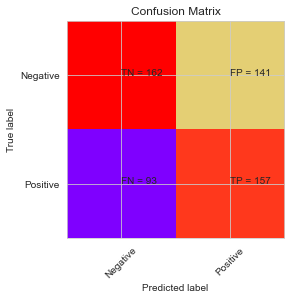

In [86]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.rainbow)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

<AxesSubplot:>

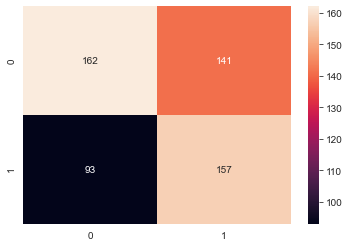

In [87]:
sns.heatmap(cm, annot = True, fmt = 'd')

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58       303
           1       0.53      0.63      0.57       250

    accuracy                           0.58       553
   macro avg       0.58      0.58      0.58       553
weighted avg       0.59      0.58      0.58       553



# Conclusion

Lets understand the above confusion matrix as per the logistic regression algorithm<br><br>
As we can see the values :-<br><br>
**TN (True Negative)** = [162] - It indicates the number of patient who had no side effects and were correctly identified by the model also.<br>
**FP (False Positive)** = [141] - It indicates the number of patient that did not had any side effect but our algorithm detected them as patients who had side effects.<br>
**FN (False Negative)** = [93] - It indicates the number of patient that had side effect but the model detected them as patients who did not  had any side effect.<br>
**TP (True positive)** = [157] - It indicates the number of patients who had side effect and were correctly identified by the model also.<br>

**Precision** - (What proportion of patient had side effect was actually correct?) = 0.53<br>
**Recall** - (What proportion of actual patient who had side effect was identified correctly?) = 0.63<br>